In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synchronization by Increase of Noise Strength $\sigma^2$

## Three Selected Examples

In [2]:
params = {
  "runtime": 500.0,

  "J_itoi": 5.0,
  "J_etoe": 0.6,
  "J_etoi": 3.2,
  "J_itoe": 7.0,
    
  "J_ppee": 6.0,
  "J_ppei": 6.0,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 10.0,
  "poisson_p": 0.6,
  "poisson_size": 800,
  "poisson_mean_input": 600,

   "const_delay": 0.2,
   "N_pop": 2
}

### Low Noise Strength -> No Synchronization

In [3]:
params_mid = dict(params)
params_mid["poisson_variance"] = 1.0

low_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 360000.0 - single neuron 450.0
Poisson strength: 0.0016666666666666668
Net 2 - rate for single neuron 270.0
Initialization time: 0.5625929832458496s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


==== Network Run Finished ====
runtime: 37.9


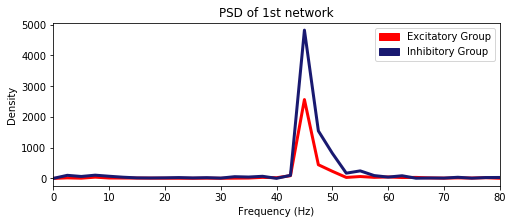

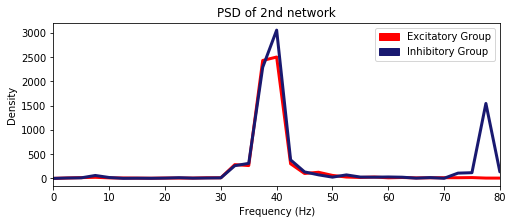

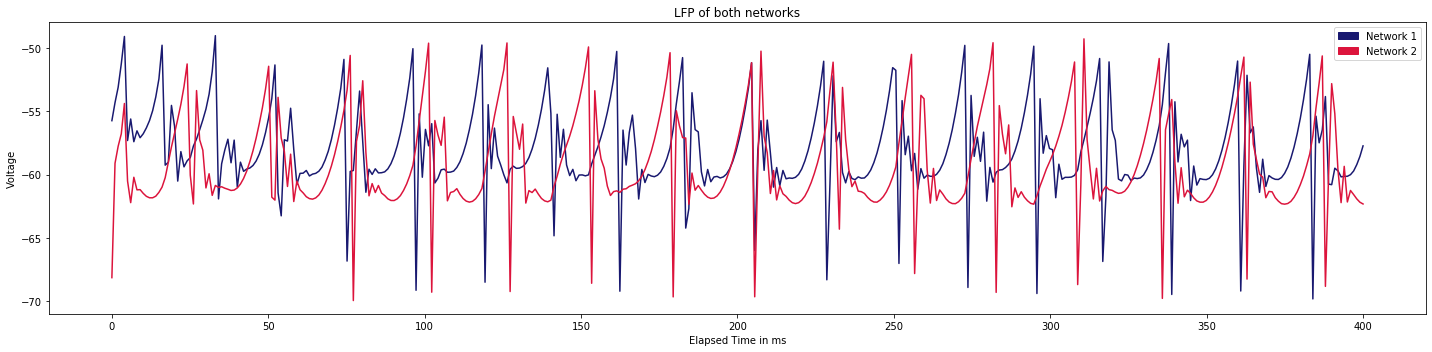

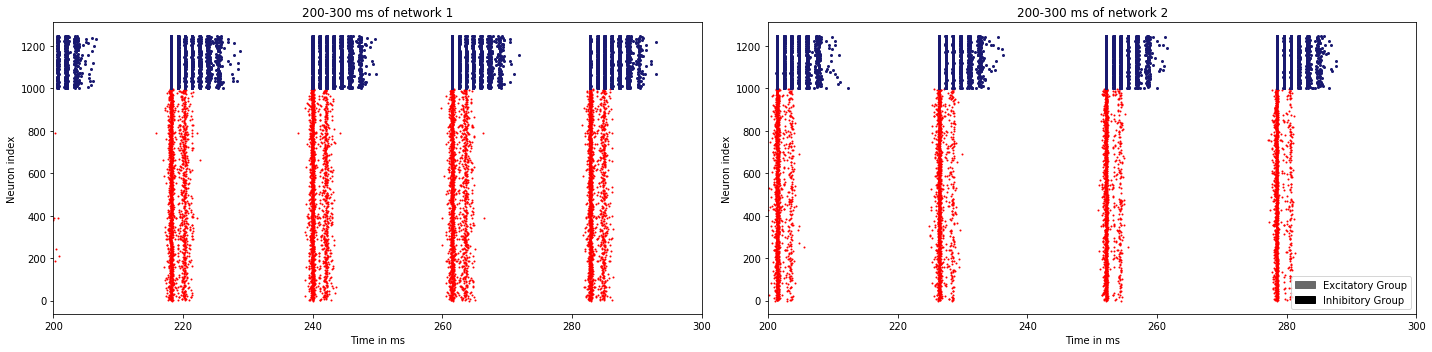

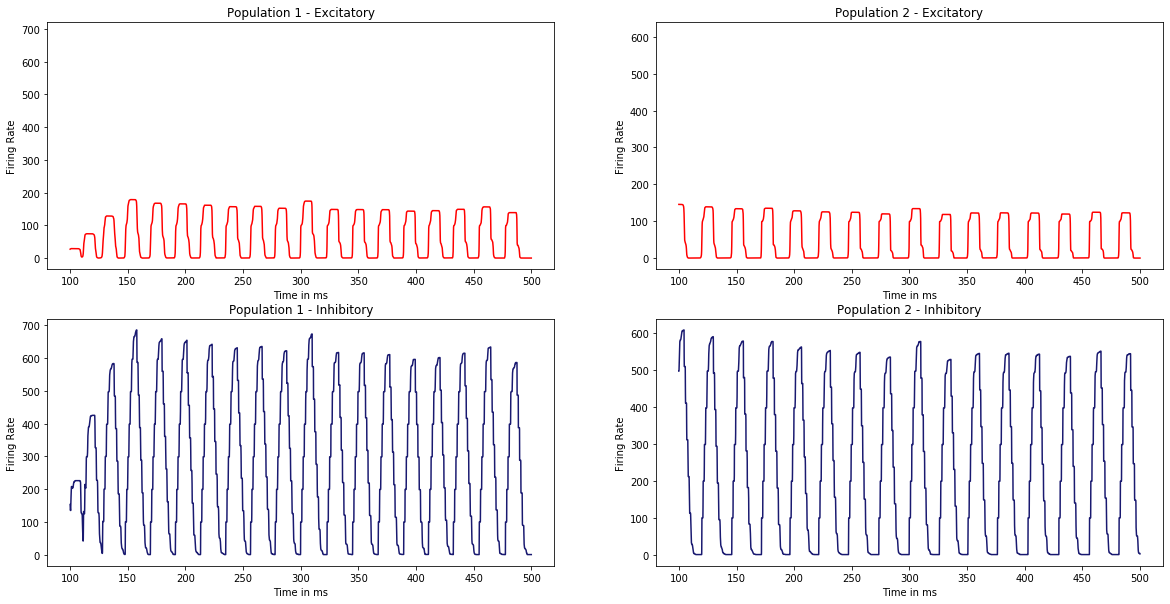

In [4]:
plots.plot_results(low_strength, pop_rates=True, xlim_psd=80)

### Mid Noise Strength

In [5]:
params_mid = dict(params)
params_mid["poisson_variance"] = 7.0

mid_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 51428.57142857143 - single neuron 64.28571428571428
Poisson strength: 0.011666666666666667
Net 2 - rate for single neuron 38.57142857142856
Initialization time: 0.481220006942749s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
==== Network Run Finished ====
runtime: 7.3


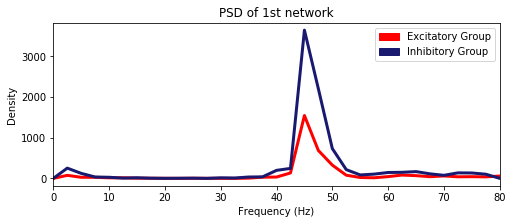

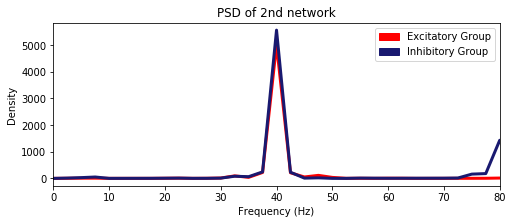

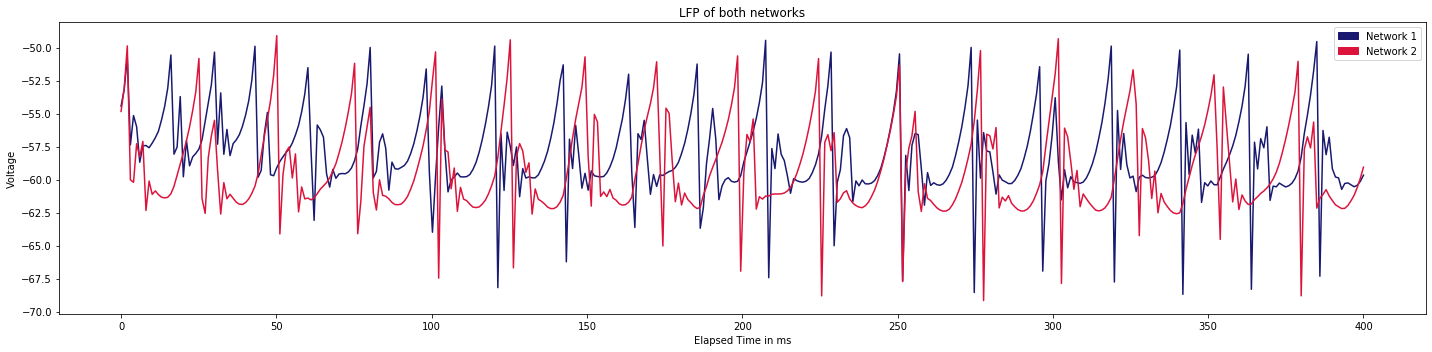

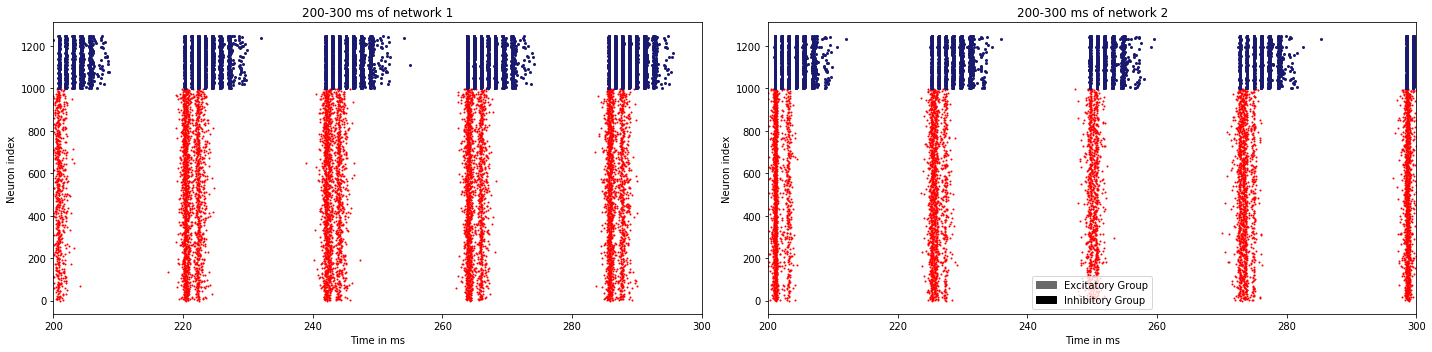

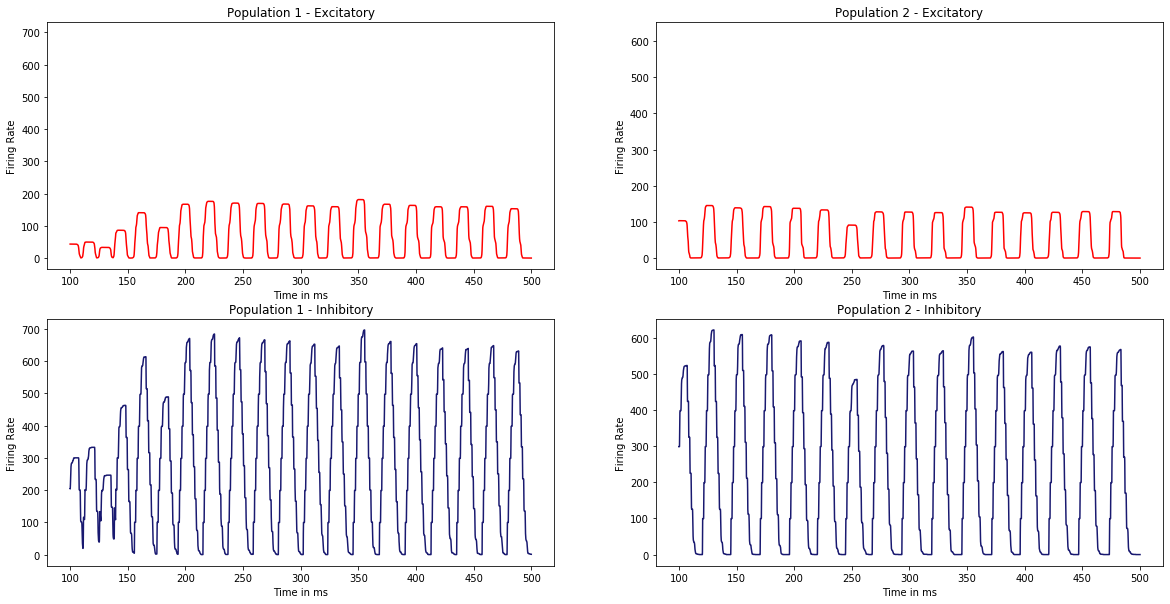

In [6]:
plots.plot_results(mid_strength, pop_rates=True, xlim_psd=80)

### High Noise Strength -> Synchronized

In [7]:
params_mid = dict(params)
params_mid["poisson_variance"] = 13.0

high_strength = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
Poisson strength: 0.021666666666666667
Net 2 - rate for single neuron 24.230769230769226
Initialization time: 0.47069501876831055s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
==== Network Run Finished ====
runtime: 7.3


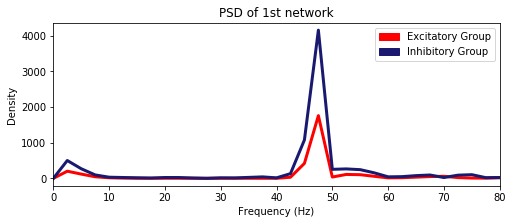

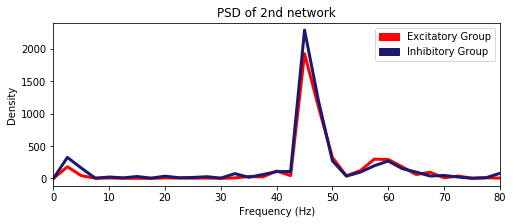

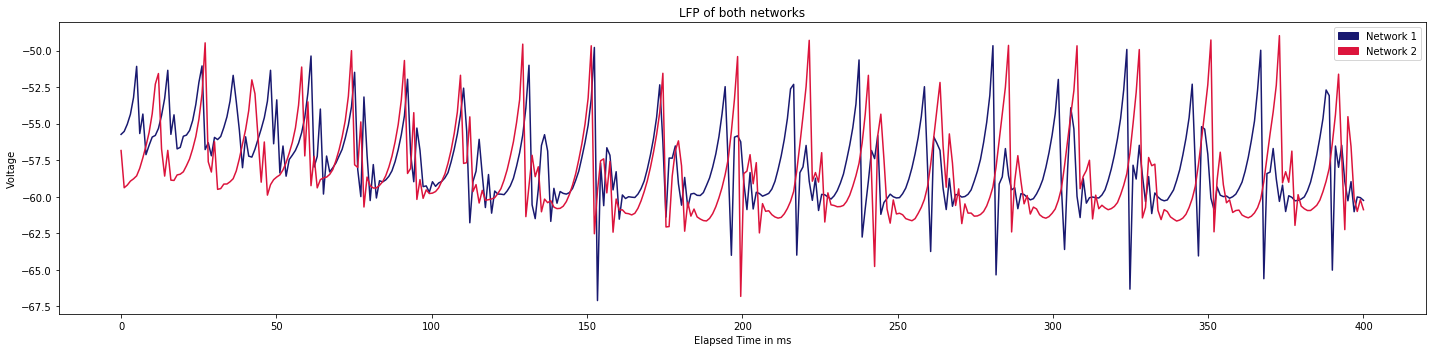

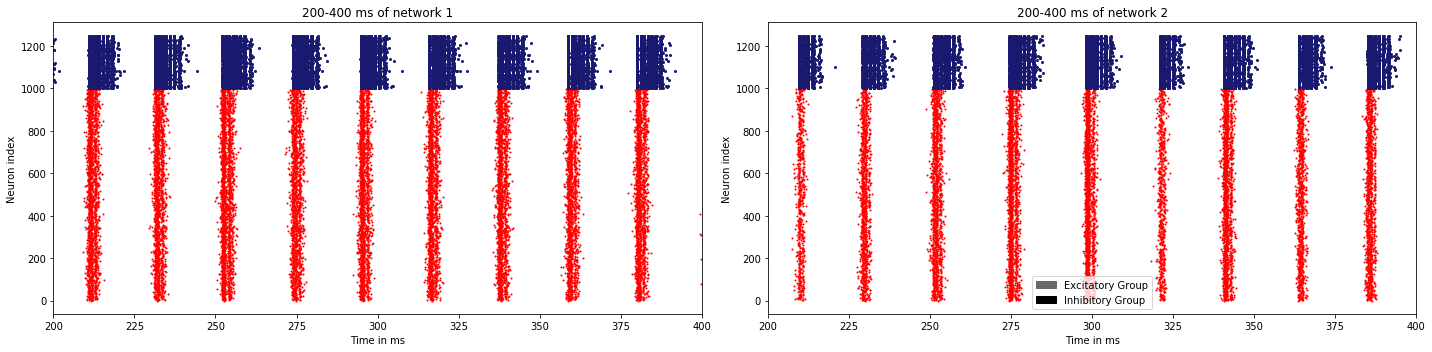

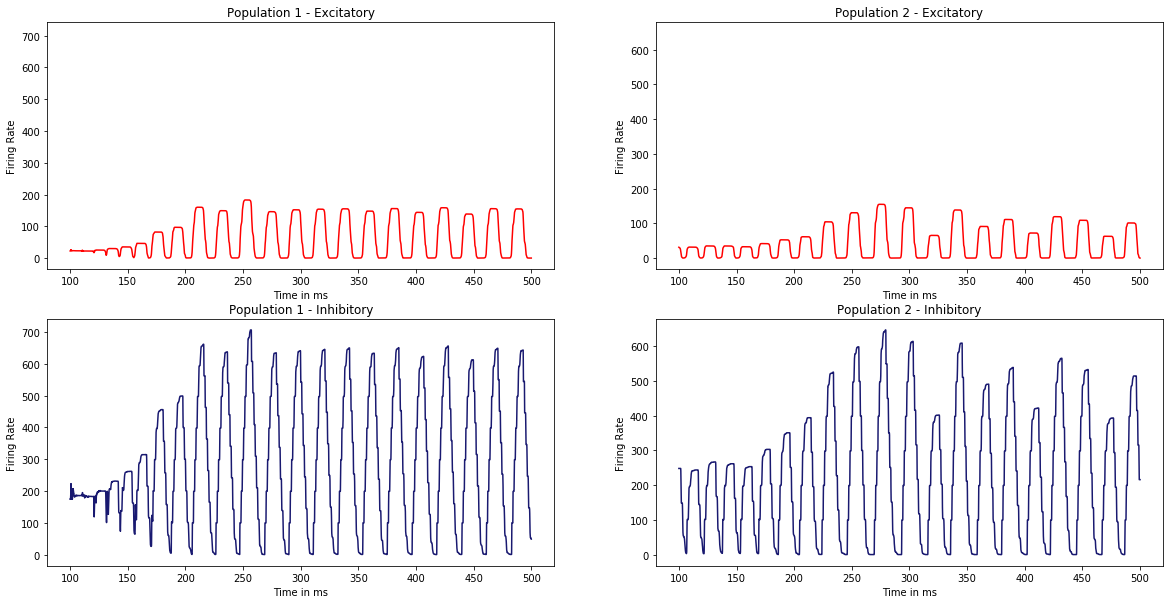

In [8]:
plots.plot_results(high_strength, pop_rates=True, xlim_psd=80, excerpt_x_left=200, excerpt_x_right=400)

## Exploration over noise ratio p and noise strength $\sigma^2$

In [9]:
exp_params = {
  "poisson_variance": np.arange(1.0, 20.0, 0.5),
  "poisson_p": np.arange(0.5, 1.0, .1),
}

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=params,
    hdf_filename=constants.MODELS_PATH + "/uncorrelated_noise_sigma.h5",
    exploration_name="uncorrelated_noise_new_8"
)

In [10]:
# ex.run()

In [11]:
ex.load_results(all=True)

100%|██████████| 190/190 [00:26<00:00,  7.30it/s]


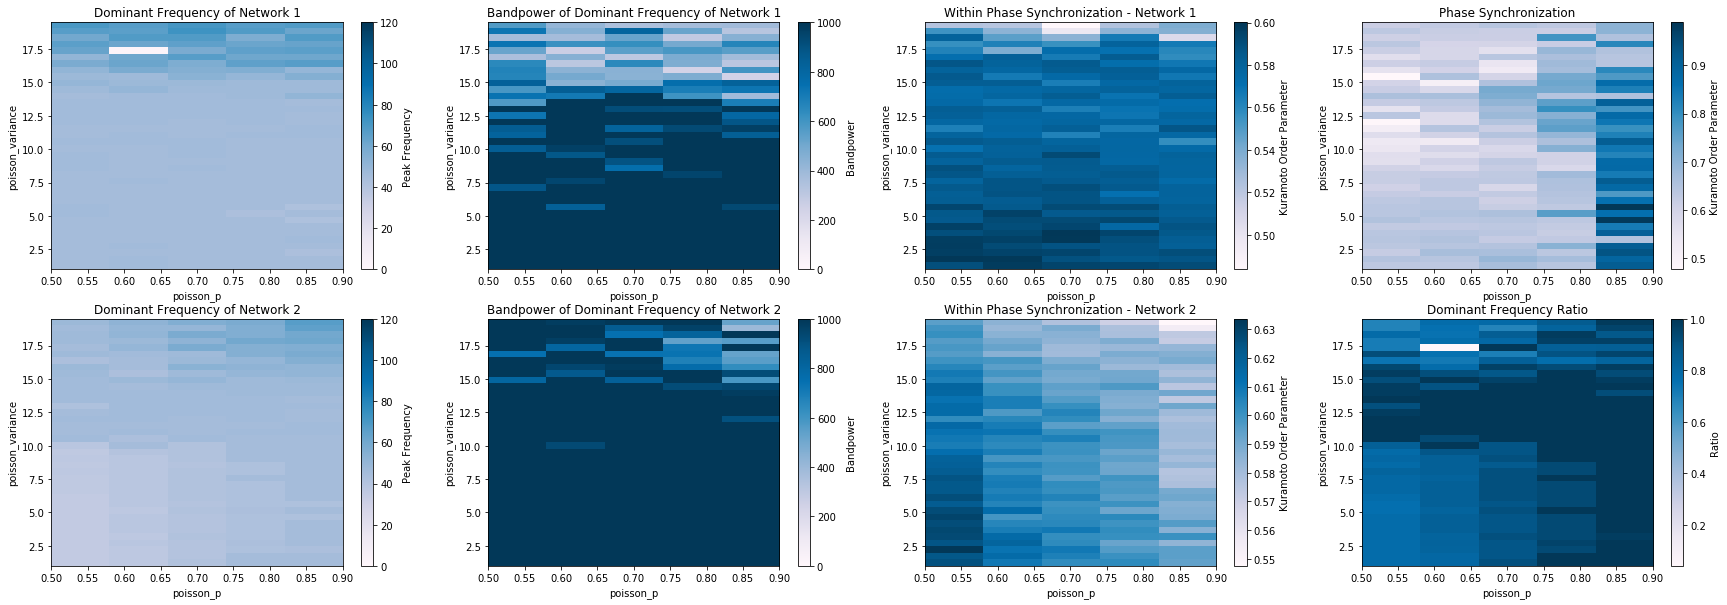

In [12]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)

### Low Ratio and Low Strength -> No Synchronization

{'poisson_p': 0.6, 'poisson_variance': 1.0}

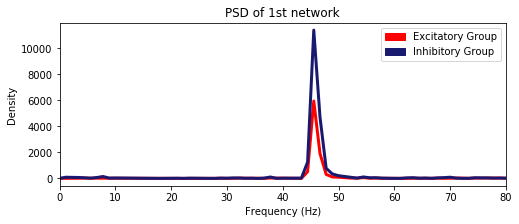

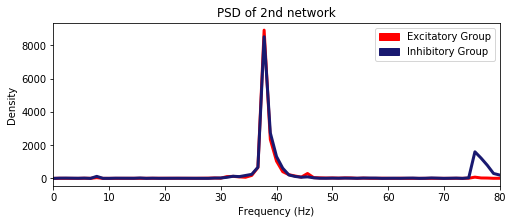

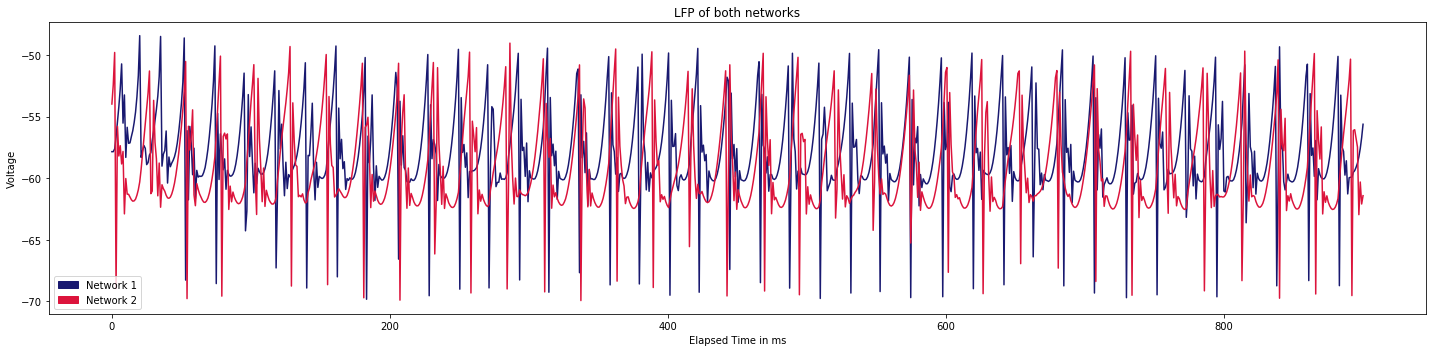

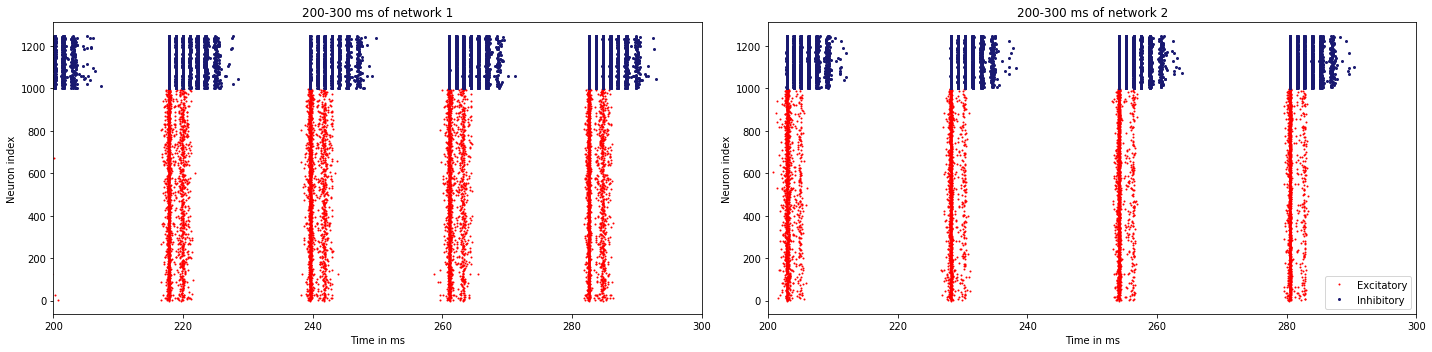

In [16]:
plots.plot_results(ex.get_run(1), xlim_psd=80, full_raster=False)
ex.params[1]

### Low Ratio and High Strength -> Synchronization

{'poisson_p': 0.6, 'poisson_variance': 13.0}

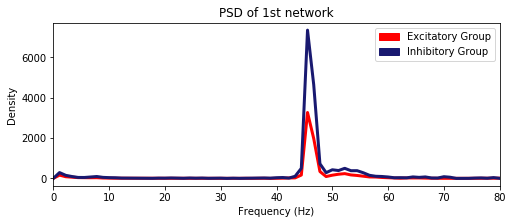

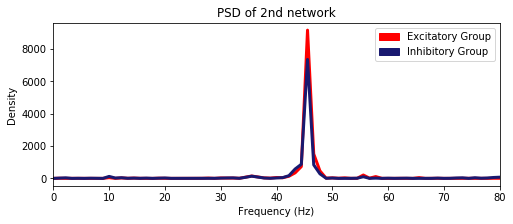

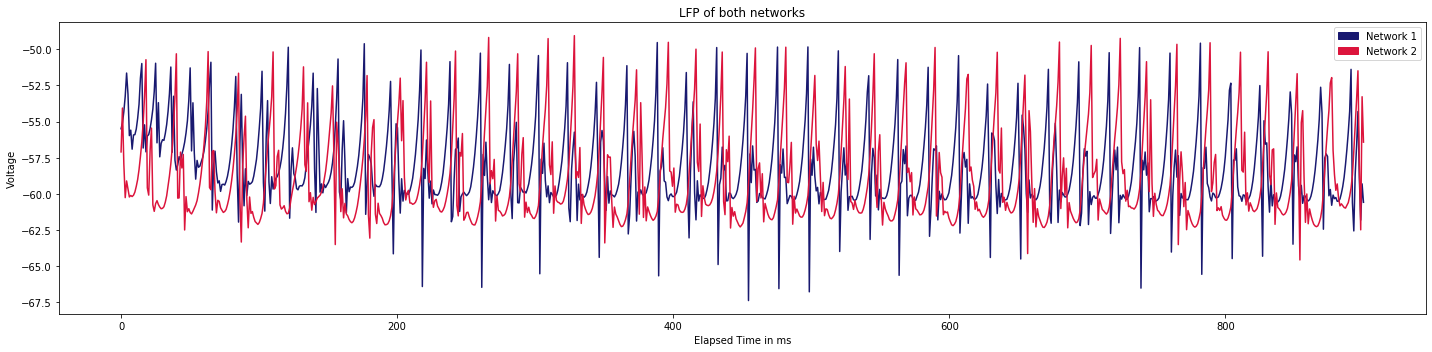

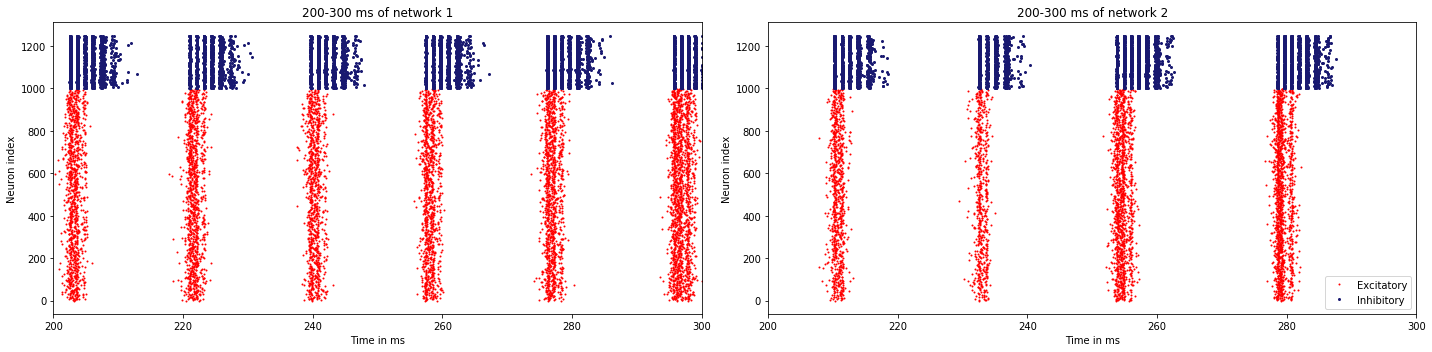

In [17]:
plots.plot_results(ex.get_run(121), xlim_psd=80, full_raster=False, raster_right=400)
ex.params[121]

## Analysis

### Observations
LFP plot shows that network 2 is lagging behind network 1. Network 1 drives Network 2.

**PING rhythm:** In both networks we see bursts on each cycle. I neurons fire 4-5 times in consecution, E neurons only 2 times. Not yet understoond why this happens. It is likely that $I_E$ is too strong or $J_{ii}$ is too weak. I should try out different values for $J_{ii}$ and see how it changes the firing pattern.

Dominant Frequency of the slower network increases with certain noise strengths and fixed noise ratio. Dom Frequency of faster network is not changed.
Further, this effect only appears if coupling strength is high enough to allow for spiking of E pop in one network to have an effect on E or I population of the other network.


### Questioning the results

**Noise Strength as Amplifier:** However, we see that increase in noise strength still leads to a strong PING rhythm. It could be that noise strength simply amplifies the inter-network interactions. But does it decrease within synchronization? If it does not, that is an imortant difference between our results and Meng & Riecke's results.

Meng reported that increase in noise strength lead to sparseness in firing and that the sparse firing allows the slower network to adapt to the faster network. Is this the case in our example?

So what is still missing is an in depth look at what properties of the network changes when going from unsynchronized state to snychronized state by an increase in the noise strength.


**TODOS for Today:**
* Repeat specific scenario with different coupling strength to see if bursting disappears
* Add plots for single parameter exploration and create example
* Run main experiment on server with high granularity!
* Plot within phase-synchronization seperately for I and E population
* Limit number of E neurons in raster plot! Or fix performance problems by converting to lower quality png?
* Extract explorations to python file so that they can be run on server